In [2]:
# Load libraries
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
%matplotlib inline
import warnings #to remove the warnings
warnings.filterwarnings('ignore')

In [8]:
df = pd.read_csv("Probablity_of_default.csv")
df.head()



,Credit_Score,Income,Debt_to_Income_Ratio,Employment_Length,Credit_History_Length,Number_of_Credit_Inquiries,Default
0,720,50000,0.35,5,10,2,0
1,650,35000,0.55,2,5,4,1
2,780,80000,0.20,10,15,1,0
3,580,25000,0.80,1,3,6,1
4,700,60000,0.40,7,12,3,0


In [10]:
# Define the independent and dependent variables 
y= df['Default'] 
#dependent variable is Decision 
x= df.drop(['Default'], axis=1) 
# splitting the data 
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.3)

In [16]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)


[[52  0]
 [ 0 62]]


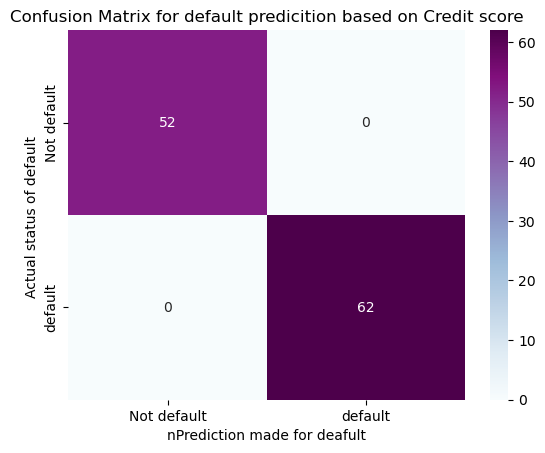

In [18]:
#Creating confusion matrix
ConfusionMatrix = confusion_matrix(y_test, y_pred)
print(ConfusionMatrix)

ax = sns.heatmap(ConfusionMatrix, annot=True, cmap='BuPu')
ax.set_title('Confusion Matrix for default predicition based on Credit score');
ax.set_xlabel('nPrediction made for deafult')
ax.set_ylabel('Actual status of default ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Not default','default'])
ax.yaxis.set_ticklabels(['Not default','default'])
## Display the visualization of the Confusion Matrix.
plt.show()

In [20]:
#Accuracy from confusion matrix
TP= ConfusionMatrix[1,1] #True positive
TN= ConfusionMatrix[0,0] #True negative
FP= 0
FN= 0
Total=len(y_test)
print("Accuracy ", (TN+TP)/Total)

Accuracy  1.0


In [22]:
print("Precision ", (TP)/(TP+FP))

Precision  1.0


In [24]:
print("Recall ", (TP)/(TP+FN))

Recall  1.0


In [28]:
print("Specificity ", (TN)/(TN+FP))

Specificity  1.0


In [30]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [32]:
y_pred = rf.predict(x_test)